## Stacked barplot template

Stacked barplot taken as a reference from:https://python-graph-gallery.com/stacked-and-percent-stacked-barplot/

### 1.First load required libraries

In [5]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

### 2. Get data from built in Seaborn **tips** dataset

- Load dataset

In [7]:
# Load tips dataset from seaborn module and check top rows
tips  = sns.load_dataset("tips")


In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 3. Start creating required calculations

This code will get the different categories of the "smoker" column

In [9]:
tips['smoker'].unique

<bound method Series.unique of 0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): ['Yes', 'No']>

- Set plot style: grey grid in the background

In [10]:
sns.set_theme(style = "darkgrid")

- set plot figure size

In [11]:
plt.figure(figsize=(14,14))

<Figure size 1400x1400 with 0 Axes>

<Figure size 1400x1400 with 0 Axes>

I need to create different calculations:
- total
- bar 1
- smoker
- bar 2

- top bar (**calculation: total**) > sum all values (smoker = No and smoker = Yes) to find y position of the bars

This calculation sums total bill by day of the week as groups total_bill value using sum() by day colum.

In [12]:
total = tips.groupby('day')['total_bill'].sum().reset_index()
total.head()

/tmp/ipykernel_915/310222500.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = tips.groupby('day')['total_bill'].sum().reset_index()


,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


- bar chart 1 ((**calculation: bar 1**)  ) > top bars (group of (smoker = No))

This new field (bar1 is a **barplot** for TOTAL_BILL values by day)

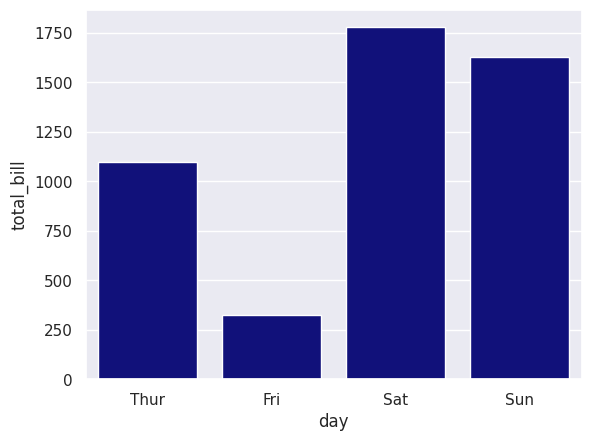

In [13]:
bar1 = sns.barplot(x = "day", y = "total_bill", data = total, color = 'darkblue')

- bottom bar > take only smokers = Yes

This new calculated field is a subset of only smokers from original tips dataset, by subsetting original data by smoker = "Yes"

In [14]:
smoker = tips[tips.smoker =='Yes']
smoker.head()

,total_bill,tip,sex,smoker,day,time,size
56,38.01,3.00,Male,Yes,Sat,Dinner,4
58,11.24,1.76,Male,Yes,Sat,Dinner,2
60,20.29,3.21,Male,Yes,Sat,Dinner,2
61,13.81,2.00,Male,Yes,Sat,Dinner,2
62,11.02,1.98,Male,Yes,Sat,Dinner,2


- bar chart 2 -> bottom bars (group of smoke = Yes)

This new calculated field is another *barplot** this time for Total_Bill but this time just for **SMOKERS**

/tmp/ipykernel_915/1760480589.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x = "day", y = "total_bill", data = smoker, estimator = sum, ci = None, color ='lightblue')


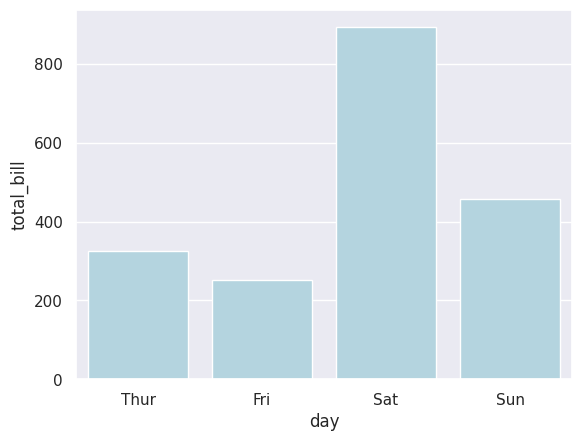

In [16]:
bar2 = sns.barplot(x = "day", y = "total_bill", data = smoker, estimator = sum, ci = None, color ='lightblue')

- Add legend

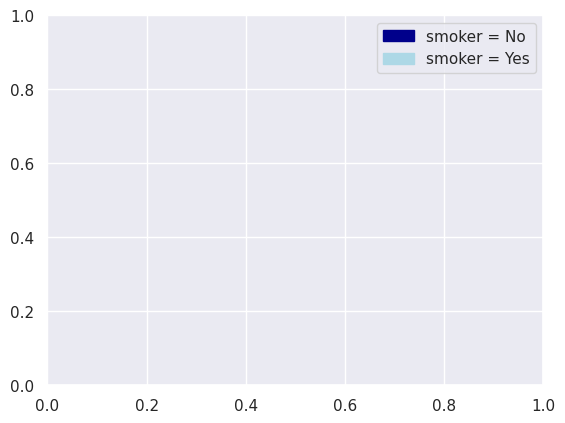

In [17]:
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

### 4.  Combine all previous steps into final Staked bar plot

Now we combine all previous steps to create a staked bar plot displaying fgor each day of the week the share of smokers as lightblue colour and the share of non smokers as darkblue colour, so we can assess how much each category contributes to the total share of bill by smokers and non smokers.

/tmp/ipykernel_915/1346555208.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total = tips.groupby('day')['total_bill'].sum().reset_index()
/tmp/ipykernel_915/1346555208.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')


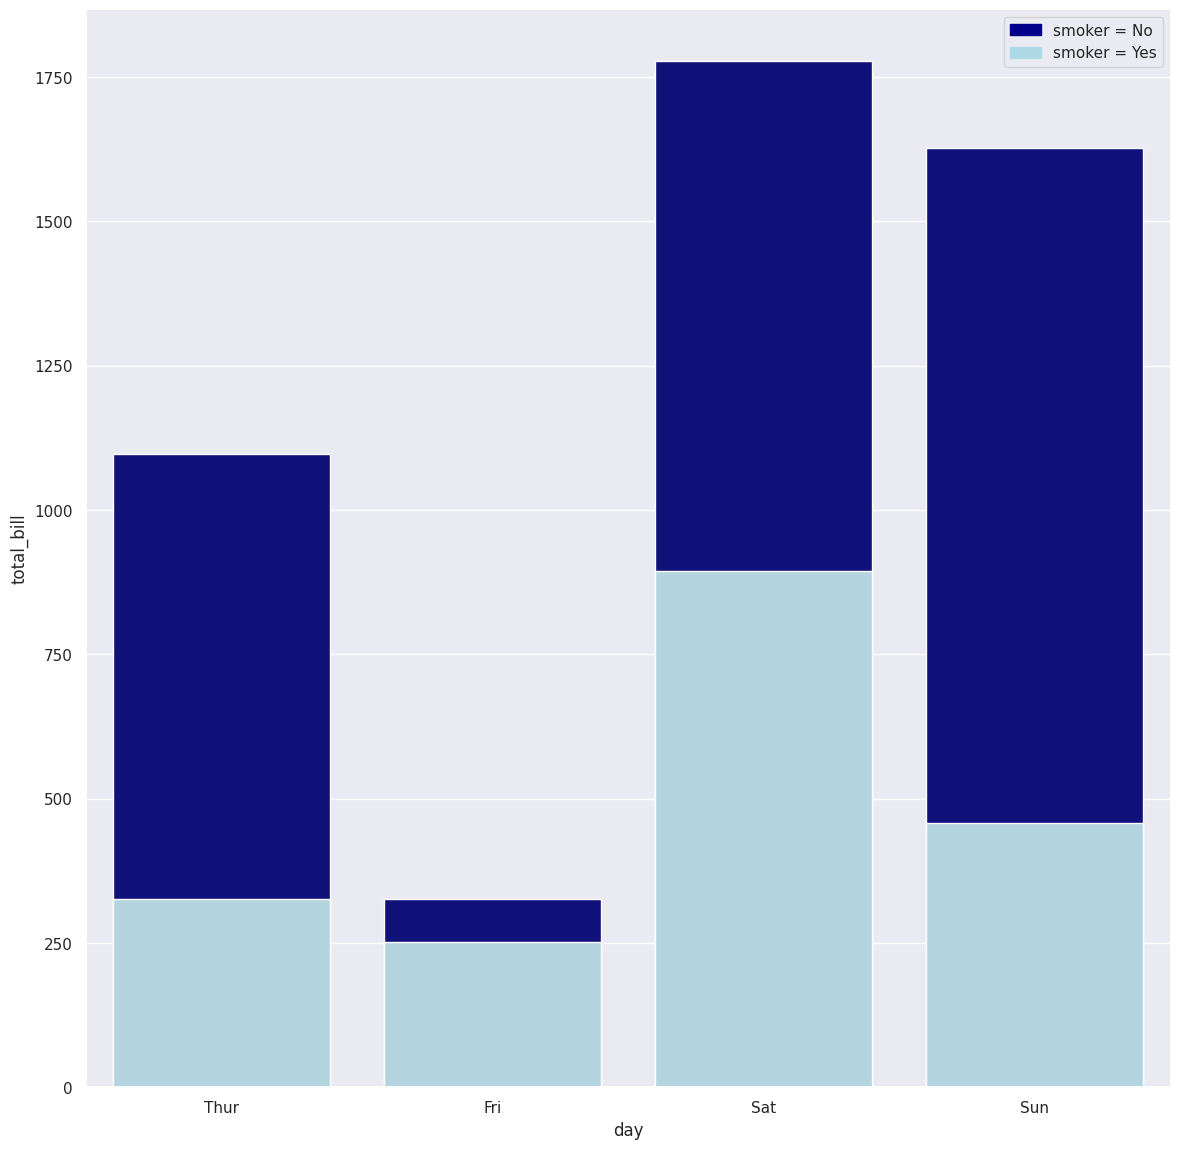

In [18]:
# set plot style: grey grid in the background:
sns.set_theme(style="darkgrid")

# set the figure size
plt.figure(figsize=(14, 14))

# top bar -> sum all values(smoker=No and smoker=Yes) to find y position of the bars
total = tips.groupby('day')['total_bill'].sum().reset_index()

# bar chart 1 -> top bars (group of 'smoker=No')
bar1 = sns.barplot(x="day",  y="total_bill", data=total, color='darkblue')

# bottom bar ->  take only smoker=Yes values from the data
smoker = tips[tips.smoker=='Yes']

# bar chart 2 -> bottom bars (group of 'smoker=Yes')
bar2 = sns.barplot(x="day", y="total_bill", data=smoker, estimator=sum, ci=None,  color='lightblue')

# add legend
top_bar = mpatches.Patch(color='darkblue', label='smoker = No')
bottom_bar = mpatches.Patch(color='lightblue', label='smoker = Yes')
plt.legend(handles=[top_bar, bottom_bar])

# show the graph
plt.show()

Next step will be to save this staked bar plot as a jpg output file